In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.figure_factory as ff
import copy
import category_encoders as ce
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [2]:
df = pd.read_csv("Desktop/archive/homeless_prep.csv") 

In [3]:
df = df.drop('CLIENT_KEY', axis=1)

In [4]:
columns={'CLIENT_KEY':'client_key','AGE':'age','GENDER':'gender','VETERAN':'veteran','INCOME':'income','NIGHTS':'nights'}
data=df.rename(columns=columns)

In [5]:
def statistical_measure(data):
    test=[['Feature','Type','NA availability','Missing_Ratio','Skewness','Kurtosis']]
    for i in data.columns:
        column_name=i
        if data[i].dtype=='O':
            column_type='Object'
        else:
            column_type=data[i].dtype
        if data[i].isnull().sum()==0:
            missing_data='None'
            missing_ratio=0
        else:
            missing_data='Yes'
            missing_ratio=round(data[i].isnull().sum()/data[i].shape[0],2)
        if data[i].dtype=='O':
            skew='Not Applicable'
            kurtosis='Not Applicable'
        else:
            skew=round(data[i].skew(),2)
            kurtosis=round(data[i].kurt(),2)
        test.append([column_name,column_type,missing_data,missing_ratio,skew,kurtosis])
    return test

In [6]:
ff.create_table(statistical_measure(data))

In [7]:
features=['substanceabuse','completed','probation','required']
for i in features:
    data[i]=data[i].map(lambda x: 'No'if x==0 else 'Yes')

In [8]:
content=[['Features','Elements']]
#store the categorical data and its unique memebers
for i,j in zip(data.columns,data.dtypes):
    if j=='object':
        content.append([i,list(data.loc[:,i].unique())])  
#present the result in the tablet format
ff.create_table(content).show()

In [9]:
ml_data=data.copy()
for i,j in enumerate(ml_data.dtypes):
    if j=='object' or 'category':
        ce_ord=ce.OrdinalEncoder()
        ml_data.iloc[:,i]=ce_ord.fit_transform(ml_data.iloc[:,i])

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_15000\1048091538.py:5: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_15000\1048091538.py:5: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`

C:\Users\Pratyush\AppData\Local\Temp\ipykernel_15000\1048091538.py:5: DeprecationWarning:

In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique

Text(0.5, 1.0, 'Bar Chart For Homeless By Gender')

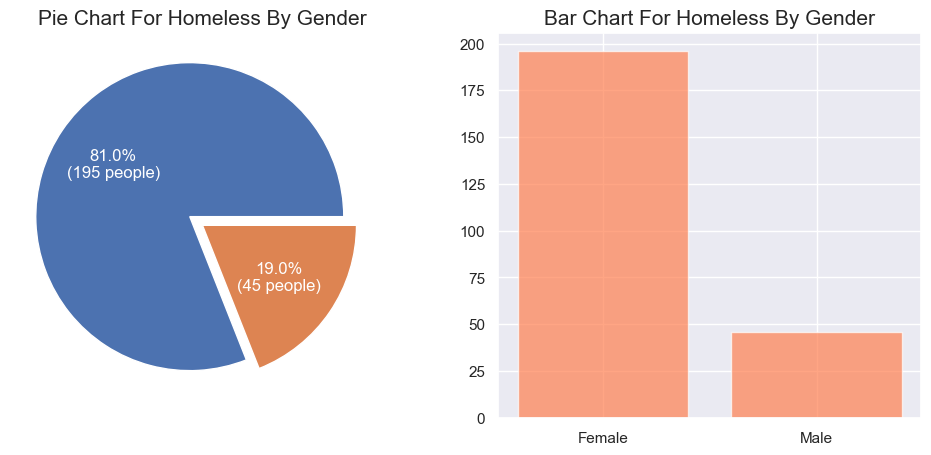

In [14]:
sns.set()
pie=data.groupby('gender')['age'].count()
fig,axes=plt.subplots(1,2,figsize=(12,5))
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d} people)".format(pct, absolute)
axes[0].pie(pie, autopct=lambda x: func(x, pie),textprops=dict(color="w"),explode=[0.1,0])
axes[0].set_title('Pie Chart For Homeless By Gender',fontsize=15)
axes[1].bar(x=pie.index,height=pie.values,color='coral',alpha=0.7)
axes[1].set_title('Bar Chart For Homeless By Gender',fontsize=15)